<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-tpf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [6]:
t = cr.Tpf(toiid=837)

Target: TOI 837
Available sectors: [10 11]
Using sector=10.



Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only




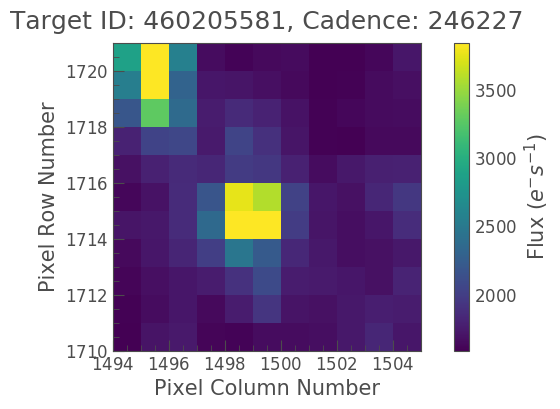

In [7]:
tpf = t.get_tpf()
tpf.plot()

## contamination
compute flux ratios based on delta magnitude between star within aperture and the brightest star (not necessarily the target)

In [16]:
mask = t.tpf.pipeline_mask
gaia_sources = t.query_gaia_dr2_catalog(radius=120) 
fluxes = cr.get_fluxes_within_mask(tpf, mask, gaia_sources)

#flux ratios of stars within aperture (relative to the brightest star)
len(fluxes)

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 120.0 arcsec.


63

In [17]:
sum(fluxes)-1 #minus one removes the contribution of brightest star

0.07517580681284941

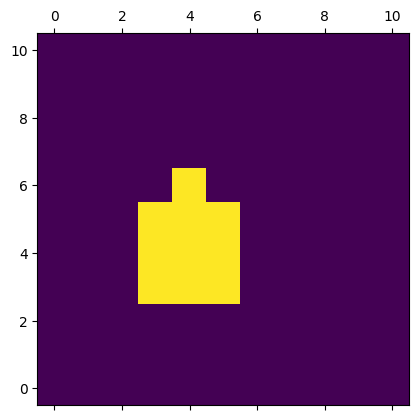

In [20]:
pl.matshow(mask, origin='lower')

In [21]:
gaia_sources = t.query_gaia_dr2_catalog(radius=90)
gaiaid = gaia_sources.iloc[0]['source_id']

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 90.0 arcsec.


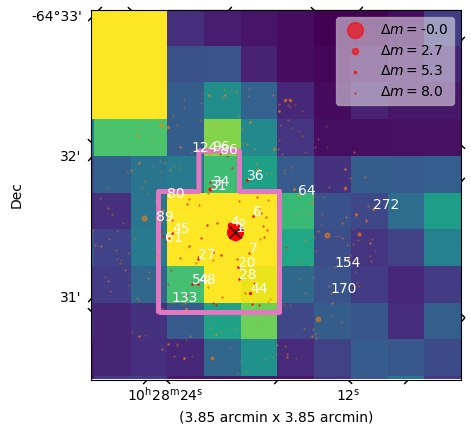

In [23]:
ax = cr.plot_gaia_sources_on_tpf(t.tpf, sap_mask='pipeline',
                                 target_gaiaid=gaiaid, gaia_sources=gaia_sources)

In [27]:
fluxes = cr.get_fluxes_within_mask(t.tpf, aper_mask=mask, gaia_sources=gaia_sources)
contratio = sum(fluxes)-1
print(f'{contratio*100:.2f}%')

7.52%


In [28]:
#compare to TIC contamination ratio
tic_params = t.query_tic_catalog(return_nearest_xmatch=True)
tic_params['contratio']

Querying TIC catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec


0.129885986

In [29]:
tic_params['contratio']-contratio

0.0547101791871506

The ~5% difference may be attributable to the difference of aperture mask used in TIC catalog (is it fixed?) relative to the aperture I used here. 